How do you understand how a decision tree makes predictions?
One of the strengths of decision trees are that they are relatively easy to interpret as you can make a visualization based on your model. This is not only a powerful way to understand your model, but also to communicate how your model works to stakeholders. 


In this video, I'll show you how Decision Trees can be plotted with Matplotlib.

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Split Data into Training and Test Sets

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

## Scikit-learn 4-Step Modeling Pattern

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier

<b>Step 2:</b> Make an instance of the Model

In [4]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features: sepal width, sepal height etc) and y (labels-which species of iris)

In [5]:
clf.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<b>Step 4:</b> Predict the labels of new data (new flowers)

Uses the information the model learned during the model training process

In [6]:
# Predict for One Observation (image)
clf.predict(X_test.iloc[0].values.reshape(1, -1))

c:\Users\oreol\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

Predict for Multiple Observations (images) at Once

In [7]:
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

## Measuring Model Performance

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [8]:
score = clf.score(X_test, Y_test)
print(score)

0.8947368421052632


## How to Visualize Decision Trees using Matplotlib

#### Default Visualization Based on the Model

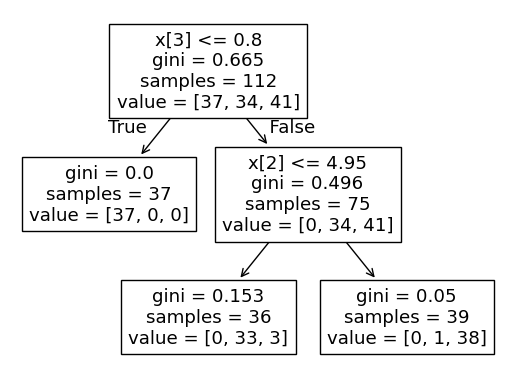

In [9]:
tree.plot_tree(clf);

#### Adjust Figure Size and Dots per inch (DPI)

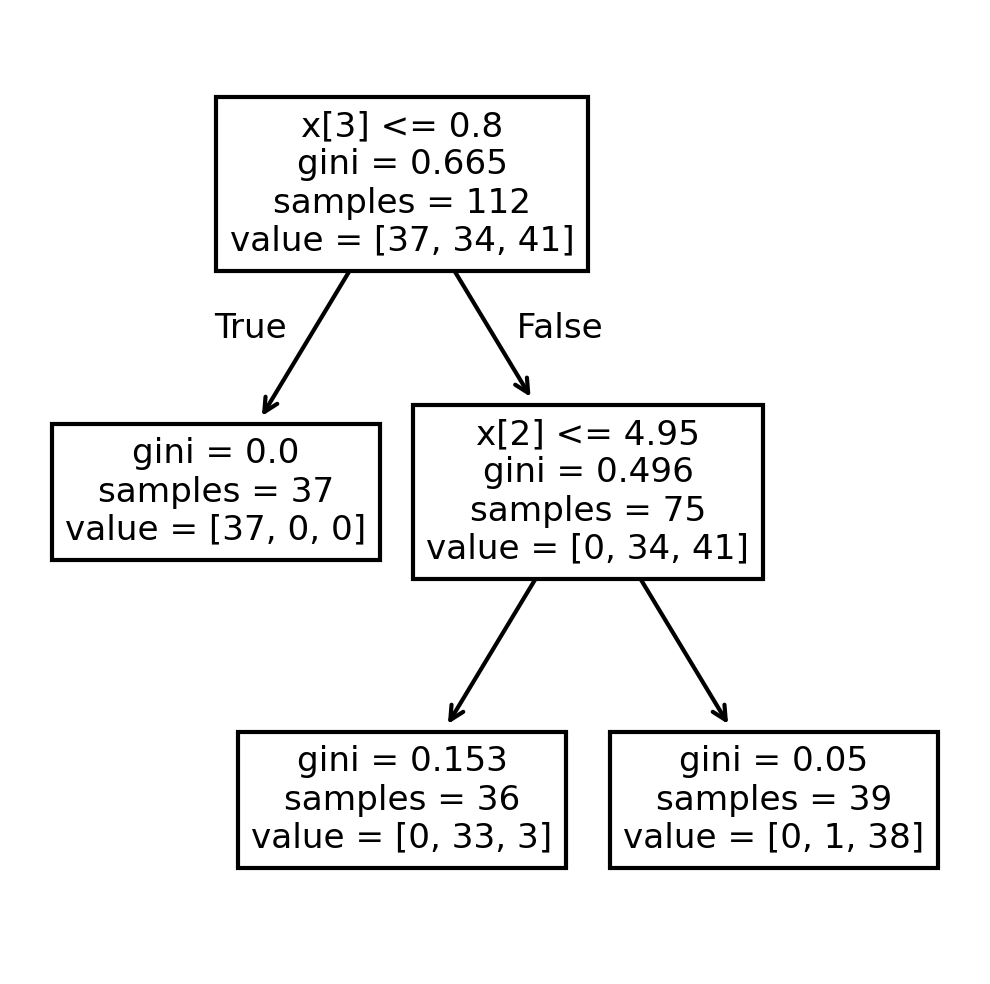

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);

#### Make Tree More Interpretable
The code below not only allows you to save a visualization based on your model, but also makes the decision tree more interpretable by adding in feature and class names.

In [11]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

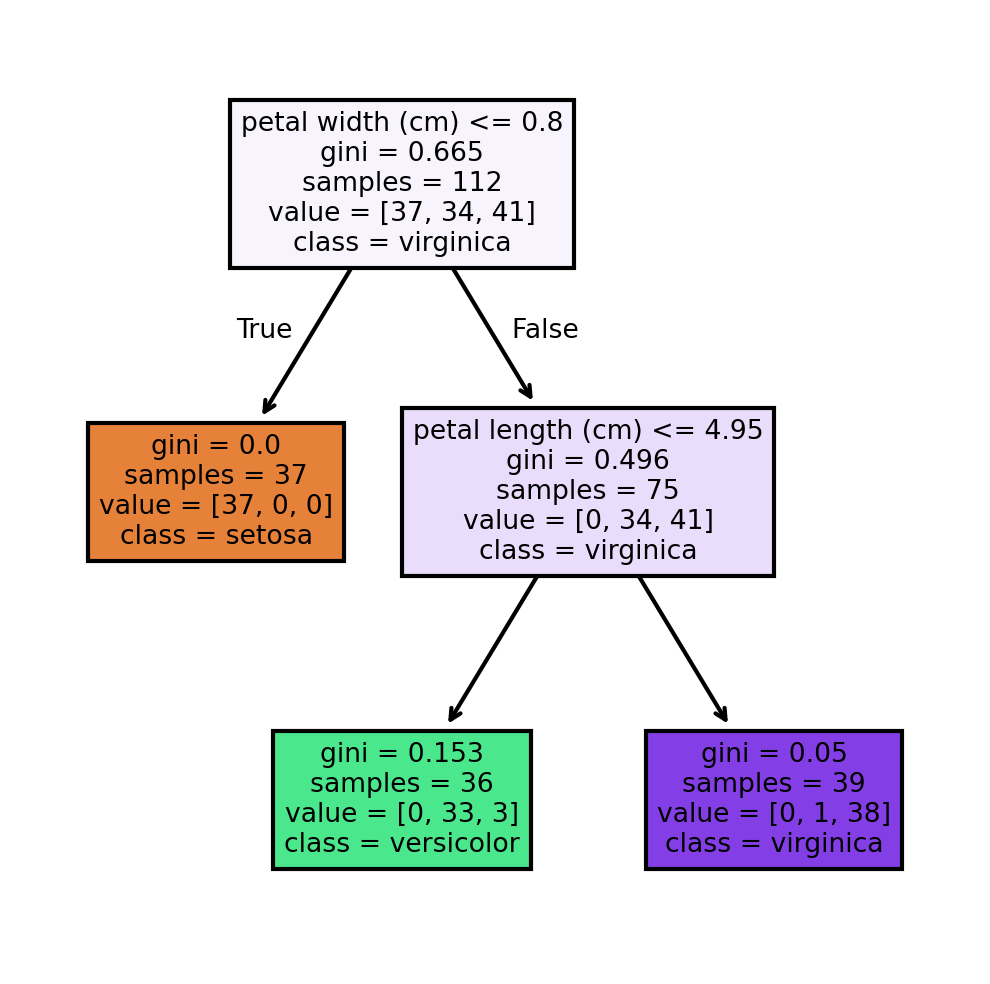

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('images/plottreefncn.png')